In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
shopeeDf = pd.read_csv("/kaggle/input/datageniusdataset/ShopeeData.csv")
shopeeDf.head()

,itemid,shopid,liked_count,cmt_count,discount,shop_location,shop_rating,name,historical_sold,price,rating_star,rating_count,rcount_with_context,status,Date
0,20030969576,18363975,25677,9675,11%,HÃ Ná»™i,4.931227,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35701,9.200000e+09,4.906667,9675,5639,normal,3/10/2024
1,19527695224,18363975,20032,6504,40%,HÃ Ná»™i,4.931227,NÆ°á»›c Táº©y Trang L'Oreal Paris 3in1 Micella...,23141,6.600000e+09,4.922202,6504,4034,normal,3/10/2024
2,21407947288,18363975,18760,2611,4%,HÃ Ná»™i,4.931227,NÆ°á»›c Hoa Há»“ng CÃ¢n Báº±ng Da Simple Sooth...,8489,1.150000e+10,4.932976,2611,1441,normal,3/10/2024
3,14185378989,18363975,14582,8600,47%,HÃ Ná»™i,4.931225,NÆ°á»›c Táº©y Trang Simple Micellar Cleansing ...,28022,7.900000e+09,4.922916,8602,5430,normal,3/10/2024
4,10001549800,18363975,29919,19065,22%,HÃ Ná»™i,4.931228,Sá»¯a Rá»­a Máº·t SVR Cho Da Dáº§u Má»¥n - SVR...,69948,1.090000e+10,4.915548,19068,10715,normal,3/10/2024


In [3]:
# How many % of missing values do we have for each feature?
missing_percentage = shopeeDf.isnull().sum() / shopeeDf.shape[0] * 100
missing_percentage

itemid                 0.000000
shopid                 0.000000
liked_count            0.000000
cmt_count              0.000000
discount               0.646496
shop_location          0.000000
shop_rating            0.000000
name                   0.000000
historical_sold        0.000000
price                  0.000000
rating_star            0.000000
rating_count           0.000000
rcount_with_context    0.000000
status                 0.000000
Date                   0.000000
dtype: float64

### Fill missing value in discount column

In [73]:
shopeeDf['discount'] = shopeeDf['discount'].fillna('0%')

In [74]:
# How many % of missing values do we have for each feature?
missing_percentage = shopeeDf.isnull().sum() / shopeeDf.shape[0] * 100
if missing_percentage.eq(0.0).all():
    print("No missing value")
else:
    print(missing_percentage)

No missing value


### Remove some feature not useful

In [6]:
df = shopeeDf.copy()
print("Columns has a 100% duplicate rate: ")
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values == 1:
        print(column)

Columns has a 100% duplicate rate: 
shopid
shop_location
status


In [7]:
shopeeDf = shopeeDf.drop(['shopid', 'shop_location', 'name','rating_star','status'], axis=1)
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,11%,4.931227,35701,9.200000e+09,9675,5639,3/10/2024
1,19527695224,20032,6504,40%,4.931227,23141,6.600000e+09,6504,4034,3/10/2024
2,21407947288,18760,2611,4%,4.931227,8489,1.150000e+10,2611,1441,3/10/2024
3,14185378989,14582,8600,47%,4.931225,28022,7.900000e+09,8602,5430,3/10/2024
4,10001549800,29919,19065,22%,4.931228,69948,1.090000e+10,19068,10715,3/10/2024
...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,17%,4.931019,7,9.990000e+10,2,1,3/31/2024
3863,23130014016,3,2,14%,4.931023,8,3.390000e+10,2,1,3/31/2024
3864,22884871515,1,0,10%,4.931019,2,2.385000e+10,0,0,3/31/2024
3865,22262533851,1,0,15%,4.931018,1,6.500000e+10,0,0,3/31/2024


In [8]:
shopeeDf['Date'] = pd.to_datetime(shopeeDf['Date'])
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,11%,4.931227,35701,9.200000e+09,9675,5639,2024-03-10
1,19527695224,20032,6504,40%,4.931227,23141,6.600000e+09,6504,4034,2024-03-10
2,21407947288,18760,2611,4%,4.931227,8489,1.150000e+10,2611,1441,2024-03-10
3,14185378989,14582,8600,47%,4.931225,28022,7.900000e+09,8602,5430,2024-03-10
4,10001549800,29919,19065,22%,4.931228,69948,1.090000e+10,19068,10715,2024-03-10
...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,17%,4.931019,7,9.990000e+10,2,1,2024-03-31
3863,23130014016,3,2,14%,4.931023,8,3.390000e+10,2,1,2024-03-31
3864,22884871515,1,0,10%,4.931019,2,2.385000e+10,0,0,2024-03-31
3865,22262533851,1,0,15%,4.931018,1,6.500000e+10,0,0,2024-03-31


In [9]:
print('Min date from data set: %s' % shopeeDf['Date'].min())
print('Max date from data set: %s' % shopeeDf['Date'].max())

Min date from data set: 2024-03-10 00:00:00
Max date from data set: 2024-03-31 00:00:00


### Dataset with 3 week period (10/03/2024 - 31/03/2024) => The amount of data is quite small, so using machine learning methods is suitable.

### Overview of the distribution of data

In [10]:
shopeeDf.describe()

,itemid,liked_count,cmt_count,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
count,3.867000e+03,3867.000000,3867.000000,3867.000000,3867.000000,3.867000e+03,3867.000000,3867.000000,3867
mean,1.466942e+10,12234.599948,2032.896302,4.931021,7035.889061,2.451592e+10,2032.798293,1210.578485,2024-03-20 16:10:47.944142592
min,1.985670e+09,0.000000,0.000000,4.930905,0.000000,9.000000e+08,0.000000,0.000000,2024-03-10 00:00:00
25%,5.481377e+09,130.000000,55.000000,4.930969,225.000000,1.125000e+10,55.000000,25.000000,2024-03-15 00:00:00
50%,1.823627e+10,16565.000000,198.000000,4.931027,673.000000,2.050000e+10,198.000000,107.000000,2024-03-21 00:00:00
75%,2.215632e+10,18615.500000,909.500000,4.931054,3643.500000,3.490000e+10,909.500000,494.000000,2024-03-26 00:00:00
max,2.591996e+10,71117.000000,106400.000000,4.931238,322223.000000,1.199000e+11,106413.000000,64046.000000,2024-03-31 00:00:00
std,8.170483e+09,10035.877379,8781.247212,0.000066,27425.013404,1.760156e+10,8782.279788,5334.233921,NaN


## Adding revenue feature to data frame and Representing Daily revenue

In [11]:
shopeeDf['discount'] = shopeeDf['discount'].apply(lambda x: float(str(x).rstrip('%')) / 100 if isinstance(x, str) else x)
shopeeDf.head()

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10


In [12]:
shopeeDf['revenue'] = shopeeDf['historical_sold'] * shopeeDf['price']*(1-shopeeDf['discount'])
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date,revenue
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10,2.923198e+14
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10,9.163836e+13
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10,9.371856e+13
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10,1.173281e+14
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10,5.946979e+14
...,...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,0.17,4.931019,7,9.990000e+10,2,1,2024-03-31,5.804190e+11
3863,23130014016,3,2,0.14,4.931023,8,3.390000e+10,2,1,2024-03-31,2.332320e+11
3864,22884871515,1,0,0.10,4.931019,2,2.385000e+10,0,0,2024-03-31,4.293000e+10
3865,22262533851,1,0,0.15,4.931018,1,6.500000e+10,0,0,2024-03-31,5.525000e+10


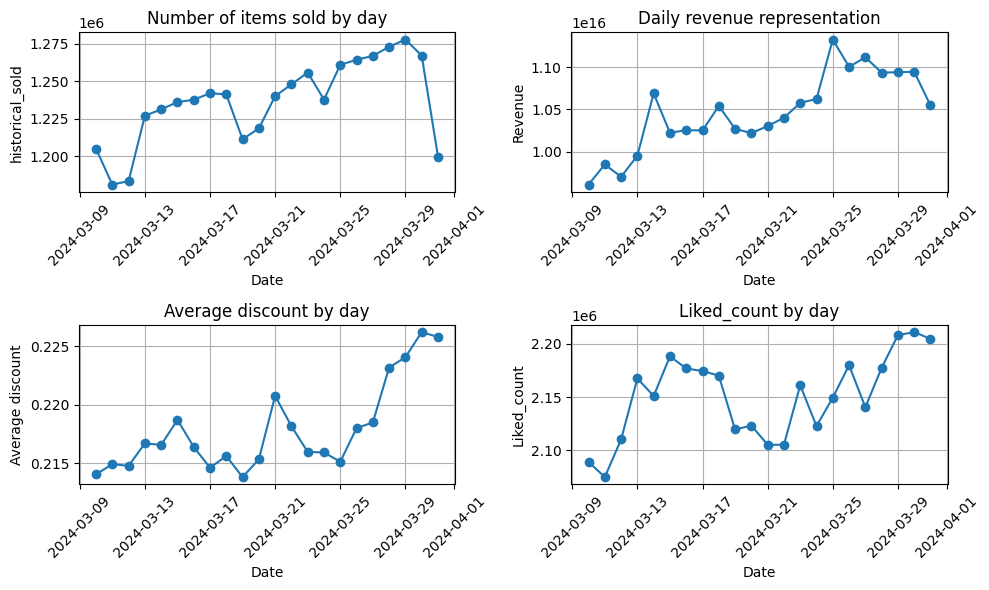

In [16]:
plt.figure(figsize=(10, 6))

grouped_df = shopeeDf.groupby('Date')['historical_sold'].sum().reset_index()
plt.subplot(2, 2, 1)
plt.plot(grouped_df['Date'], grouped_df['historical_sold'], marker='o', linestyle='-')
plt.title('Number of items sold by day')
plt.xlabel('Date')
plt.ylabel('historical_sold')
plt.grid(True)
plt.xticks(rotation=45)


daily_revenue_df = shopeeDf.groupby('Date')['revenue'].sum().reset_index()
plt.subplot(2, 2, 2)
plt.plot(daily_revenue_df['Date'], daily_revenue_df['revenue'], marker='o', linestyle='-')
plt.title('Daily revenue representation')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)

discount_by_date = shopeeDf.groupby('Date')['discount'].mean().reset_index()
plt.subplot(2, 2, 3)
plt.plot(discount_by_date['Date'], discount_by_date['discount'], marker='o', linestyle='-')
plt.title('Average discount by day')
plt.xlabel('Date')
plt.ylabel('Average discount')
plt.grid(True)
plt.xticks(rotation=45)


Likedcount_by_date = shopeeDf.groupby('Date')['liked_count'].sum().reset_index()
plt.subplot(2, 2, 4)
plt.plot(Likedcount_by_date['Date'], Likedcount_by_date['liked_count'], marker='o', linestyle='-')
plt.title('Liked_count by day')
plt.xlabel('Date')
plt.ylabel('Liked_count')
plt.grid(True)
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### => The last days of the month such as 25 - 27 Shopee often have discounts, so number of items sold, revenue, discount, liked count by day increase on these days, and the beginning of the month is less

## Top 5 Most Sold Items and Top 5 Least Sold Items

In [11]:
grouped = shopeeDf.groupby('itemid')['historical_sold'].sum()
top_5_product = grouped.sort_values(ascending=False).head(5)
top_5_items = top_5_product.index.tolist()
top_5_quantity = [grouped.loc[i] for i in top_5_items]
top_5_price = [shopeeDf.loc[shopeeDf['itemid'] == i, 'price'].iloc[0] for i in top_5_items]
data = {
    'items': top_5_items,
    'quantity': top_5_quantity,
    'price': top_5_price
}

top5_highest_sold = pd.DataFrame(data)
top5_highest_sold
# bottom_5_items = grouped.sort_values().head(5)

,items,quantity,price
0,2421653980,7043524,9.500000e+09
1,5451541710,2724989,1.270000e+10
2,10001549800,1576811,1.090000e+10
3,23232932577,1318263,6.790000e+09
4,16870222597,1140525,4.200000e+09


In [12]:
grouped = shopeeDf.groupby('itemid')['historical_sold'].sum()
bottom_5_product = grouped.sort_values().head(5)
bottom_5_items = bottom_5_product.index.tolist()
bottom_5_quantity = [grouped.loc[i] for i in bottom_5_items]
bottom_5_price = [shopeeDf.loc[shopeeDf['itemid'] == i, 'price'].iloc[0] for i in bottom_5_items]
data = {
    'items': bottom_5_items,
    'quantity': bottom_5_quantity,
    'price': bottom_5_price
}

top_5least_sold_item = pd.DataFrame(data)
top_5least_sold_item
# bottom_5_items = grouped.sort_values().head(5)

,items,quantity,price
0,25919955014,0,6.500000e+10
1,15689885742,0,7.700000e+10
2,24070912680,0,1.990000e+10
3,25617038549,0,5.000000e+10
4,24320863474,0,1.990000e+10


### Export the itemids with the highest and lowest selling quantities, see the prices of items sold at high prices will be less likely to be bought => Solution: Suggest promotional campaigns or buy compos to solve this situation.

### Number of item type corresponding to number of csv_file in review data

In [18]:
len(shopeeDf['itemid'].unique())

196

In [19]:
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date,revenue
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10,2.923198e+14
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10,9.163836e+13
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10,9.371856e+13
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10,1.173281e+14
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10,5.946979e+14
...,...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,0.17,4.931019,7,9.990000e+10,2,1,2024-03-31,5.804190e+11
3863,23130014016,3,2,0.14,4.931023,8,3.390000e+10,2,1,2024-03-31,2.332320e+11
3864,22884871515,1,0,0.10,4.931019,2,2.385000e+10,0,0,2024-03-31,4.293000e+10
3865,22262533851,1,0,0.15,4.931018,1,6.500000e+10,0,0,2024-03-31,5.525000e+10


## Using Machine Learning Model for Training 

## 1. Random Forest 

In [36]:
import pandas as pd

# One-hot encoding for 'itemid' feature
X_encoded = pd.get_dummies(shopeeDf.drop(columns=['price','discount', 'revenue', 'liked_count', 'cmt_count','rating_count','Date']), columns=['itemid'])

from sklearn.preprocessing import StandardScaler

# Perform data normalization for features in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
y = shopeeDf['historical_sold']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model's performance
train_rmse = mean_squared_error(y_train, rf_model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, rf_model.predict(X_test), squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 28.882367353420427
Test RMSE: 58.13478817586936


In [38]:
# Take the importance of features
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                 Feature  Importance
1        historical_sold    0.463920
2    rcount_with_context    0.330147
9      itemid_2421653980    0.193397
48     itemid_5451541710    0.012390
87    itemid_16870222597    0.000030
..                   ...         ...
176   itemid_24320863474    0.000000
175   itemid_24070912680    0.000000
133   itemid_21094702524    0.000000
145   itemid_22159356254    0.000000
198   itemid_25919955014    0.000000

[199 rows x 2 columns]


## 2. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

train_rmse = mean_squared_error(y_train, lr_model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, lr_model.predict(X_test), squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 9.717994879822407e-11
Test RMSE: 1.0465745881020919e-10


### => Linear Regression forecasts better than Random Forest

In [42]:
# Take the importance of features
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                 Feature  Importance
1        historical_sold    0.463920
2    rcount_with_context    0.330147
9      itemid_2421653980    0.193397
48     itemid_5451541710    0.012390
87    itemid_16870222597    0.000030
..                   ...         ...
176   itemid_24320863474    0.000000
175   itemid_24070912680    0.000000
133   itemid_21094702524    0.000000
145   itemid_22159356254    0.000000
198   itemid_25919955014    0.000000

[199 rows x 2 columns]


### Check overfit by cross-validation technique

In [43]:
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# cross-validation
cv_scores = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to RMSE
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [6.91524811e+02 2.12237437e-10 3.35303403e-11 5.51623611e-11
 4.48795140e+02]
Mean RMSE: 228.06399033514867


### => Based on the results of RMSE cross-validation, it can be seen that some folds have a very small RMSE (close to 0) while others have RMSE many times larger. This may be a sign of overfitting.

## Solution: Using regularization technique to solve overfitting by reducing the weight of unimportant features.

### * Ridge Regression (L2 regularization)

In [60]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.00001) 
ridge_model.fit(X_train, y_train)
test_rmse = mean_squared_error(y_test, ridge_model.predict(X_test), squared=False)
print("Test RMSE (Ridge Regression):", test_rmse)

Test RMSE (Ridge Regression): 0.032554435169938466


### * Lasso Regression (L1 regularization)

In [61]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(X_train, y_train)
test_rmse = mean_squared_error(y_test, lasso_model.predict(X_test), squared=False)
print("Test RMSE (Lasso Regression):", test_rmse)

Test RMSE (Lasso Regression): 0.03037807012342889


# Processing for Review data

## 1. Read file and ignore empty file

In [62]:
def read_csv_files_in_folder(folder_path):
    valid_dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            try:
                df = pd.read_csv(file_path)
                if not df.empty:
                    valid_dataframes.append(df)
            except pd.errors.EmptyDataError:
                print(f"Ignoring file '{file_name}' as it has no columns.")
            except Exception as e:
                print(f"Error reading file '{file_name}':", e)
    combined_df = pd.concat(valid_dataframes, ignore_index=True)
    return combined_df

In [63]:
folder_path = "/kaggle/input/datageniusdataset/DataGeniusDataset"
data = read_csv_files_in_folder(folder_path)
data

Ignoring file 'SR_18363975_25770857675.csv' as it has no columns.
Ignoring file 'SR_18363975_24671491249.csv' as it has no columns.
Ignoring file 'SR_18363975_22884871515.csv' as it has no columns.
Ignoring file 'SR_18363975_15689885742.csv' as it has no columns.
Ignoring file 'SR_18363975_22262533851.csv' as it has no columns.
Ignoring file 'SR_18363975_25919955014.csv' as it has no columns.


,comment,orderid,itemid,cmtid,ctime,rating,userid,shopid,rating_star,status,...,template_hints,template_tags_hints,region,original_item_info,template_abt,is_repeat_edited,show_super_review_tag,super_review_status,item_cart_info,is_invalid_item
0,Bao bì:chắc chắn đẹp\nMẹo:chắc dùng sáng tối\n...,163827590216537,23964035033,14489832370,1710219482,1,639484604,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
1,Mùi hương:ko\nDành cho da:dầu mụn\nCông dụng:t...,163743760258750,23964035033,14502601697,1710314439,1,608326882,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
2,📢📢📢 KÈO SHOCK KO THỂ BỎ QUA . SIÊU NGON GIÁ SH...,163862299276953,23964035033,14606346247,1711076855,1,315221714,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
3,"Giao hàng nhanh, đóng gói cẩn thận và chắc chắ...",164094015271747,23964035033,14612731605,1711109284,1,48455318,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
4,Mới dùng nên chưa biết hiệu quả như nào sẽ qua...,166432522234142,23964035033,14859067689,1712825926,1,474225221,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138626,NaN,134145651252728,22633128407,11236252622,1681192014,1,270666568,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
138627,NaN,134887319219596,22633128407,11251068596,1681304101,1,136954672,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
138628,NaN,133555380247987,22633128407,11122200570,1680151621,1,13656941,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN
138629,NaN,134499815292085,22633128407,11215353211,1681016802,1,324477428,18363975,5,2,...,NaN,NaN,VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",NaN,NaN,False,0,NaN,NaN


In [64]:
data = data.dropna(axis=1, how='all')
data

,comment,orderid,itemid,cmtid,ctime,rating,userid,shopid,rating_star,status,...,overall_fit,is_normal_item,image_data,key_media,is_super_review,super_reviewer_tag,region,original_item_info,show_super_review_tag,super_review_status
0,Bao bì:chắc chắn đẹp\nMẹo:chắc dùng sáng tối\n...,163827590216537,23964035033,14489832370,1710219482,1,639484604,18363975,5,2,...,0,False,[{'image_id': 'vn-11134103-7r98o-lsrzz54rsnfd6...,"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
1,Mùi hương:ko\nDành cho da:dầu mụn\nCông dụng:t...,163743760258750,23964035033,14502601697,1710314439,1,608326882,18363975,5,2,...,0,False,[{'image_id': 'vn-11134103-7r98o-lstkhioby6kk2...,"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
2,📢📢📢 KÈO SHOCK KO THỂ BỎ QUA . SIÊU NGON GIÁ SH...,163862299276953,23964035033,14606346247,1711076855,1,315221714,18363975,5,2,...,0,False,[{'image_id': 'vn-11134103-7r98o-lt65ywjtfkwpe...,"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
3,"Giao hàng nhanh, đóng gói cẩn thận và chắc chắ...",164094015271747,23964035033,14612731605,1711109284,1,48455318,18363975,5,2,...,0,False,[{'image_id': 'vn-11134103-7r98o-lt6p50ghf6pw0...,"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
4,Mới dùng nên chưa biết hiệu quả như nào sẽ qua...,166432522234142,23964035033,14859067689,1712825926,1,474225221,18363975,5,2,...,0,False,[{'image_id': 'vn-11134103-7r98o-ltz23yvrzittd...,"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138626,NaN,134145651252728,22633128407,11236252622,1681192014,1,270666568,18363975,5,2,...,0,True,[],"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138627,NaN,134887319219596,22633128407,11251068596,1681304101,1,136954672,18363975,5,2,...,0,True,[],"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138628,NaN,133555380247987,22633128407,11122200570,1680151621,1,13656941,18363975,5,2,...,0,True,[],"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138629,NaN,134499815292085,22633128407,11215353211,1681016802,1,324477428,18363975,5,2,...,0,True,[],"{'key_media_code': 0, 'key_media_id': ''}",False,[],VN,"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0


In [65]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
remove_feature_ls = []
for index, value in missing_percentage.items():
    if value != 0:
        remove_feature_ls.append(index)
        print(index, value)

comment 28.34286703551154
author_username 1.078402377534606
author_portrait 30.500393129963715
author_shopid 1.078402377534606
ItemRatingReply 75.34173453268028
editable_date 73.27076916418406
like_count 96.27500342636208
display_variation_filter 85.99375320094352
key_media 2.274383074492718
region 0.009377411978561793


In [66]:
data = data.drop(remove_feature_ls, axis=1)
data

,orderid,itemid,cmtid,ctime,rating,userid,shopid,rating_star,status,mtime,...,sip_info,is_repeated_purchase,overall_fit,is_normal_item,image_data,is_super_review,super_reviewer_tag,original_item_info,show_super_review_tag,super_review_status
0,163827590216537,23964035033,14489832370,1710219482,1,639484604,18363975,5,2,1710256964,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,False,[{'image_id': 'vn-11134103-7r98o-lsrzz54rsnfd6...,False,[],"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
1,163743760258750,23964035033,14502601697,1710314439,1,608326882,18363975,5,2,1712653011,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,False,[{'image_id': 'vn-11134103-7r98o-lstkhioby6kk2...,False,[],"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
2,163862299276953,23964035033,14606346247,1711076855,1,315221714,18363975,5,2,1711076855,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,False,[{'image_id': 'vn-11134103-7r98o-lt65ywjtfkwpe...,False,[],"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
3,164094015271747,23964035033,14612731605,1711109284,1,48455318,18363975,5,2,1713160129,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,False,[{'image_id': 'vn-11134103-7r98o-lt6p50ghf6pw0...,False,[],"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
4,166432522234142,23964035033,14859067689,1712825926,1,474225221,18363975,5,2,1713160130,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,False,[{'image_id': 'vn-11134103-7r98o-ltz23yvrzittd...,False,[],"{'itemid': 23964035033, 'shopid': 18363975, 'n...",False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138626,134145651252728,22633128407,11236252622,1681192014,1,270666568,18363975,5,2,1681192014,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,True,[],False,[],"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138627,134887319219596,22633128407,11251068596,1681304101,1,136954672,18363975,5,2,1681304101,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,True,[],False,[],"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138628,133555380247987,22633128407,11122200570,1680151621,1,13656941,18363975,5,2,1680151621,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,True,[],False,[],"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0
138629,134499815292085,22633128407,11215353211,1681016802,1,324477428,18363975,5,2,1681016802,...,"{'is_oversea': False, 'origin_region': 'my', '...",False,0,True,[],False,[],"{'itemid': 22633128407, 'shopid': 18363975, 'n...",False,0


In [67]:
data.head().T

,0,1,2,3,4
orderid,163827590216537,163743760258750,163862299276953,164094015271747,166432522234142
itemid,23964035033,23964035033,23964035033,23964035033,23964035033
cmtid,14489832370,14502601697,14606346247,14612731605,14859067689
ctime,1710219482,1710314439,1711076855,1711109284,1712825926
rating,1,1,1,1,1
userid,639484604,608326882,315221714,48455318,474225221
shopid,18363975,18363975,18363975,18363975,18363975
rating_star,5,5,5,5,5
status,2,2,2,2,2
mtime,1710256964,1712653011,1711076855,1713160129,1713160130


In [68]:
# Get useful feature
df = data[['orderid', 'itemid', 'cmtid', 'ctime','userid', 'mtime', 'submit_time']]
df

,orderid,itemid,cmtid,ctime,userid,mtime,submit_time
0,163827590216537,23964035033,14489832370,1710219482,639484604,1710256964,1710219482
1,163743760258750,23964035033,14502601697,1710314439,608326882,1712653011,1710314439
2,163862299276953,23964035033,14606346247,1711076855,315221714,1711076855,1711076855
3,164094015271747,23964035033,14612731605,1711109284,48455318,1713160129,1711109284
4,166432522234142,23964035033,14859067689,1712825926,474225221,1713160130,1712825926
...,...,...,...,...,...,...,...
138626,134145651252728,22633128407,11236252622,1681192014,270666568,1681192014,0
138627,134887319219596,22633128407,11251068596,1681304101,136954672,1681304101,0
138628,133555380247987,22633128407,11122200570,1680151621,13656941,1680151621,0
138629,134499815292085,22633128407,11215353211,1681016802,324477428,1681016802,0


In [69]:
df.loc[:, 'mtime'] = pd.to_datetime(df['mtime'], unit='s')
df.loc[:, 'ctime'] = pd.to_datetime(df['ctime'], unit='s')
df.loc[:, 'submit_time'] = pd.to_datetime(df['submit_time'], unit='s')
df

/tmp/ipykernel_33/3310197782.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2024-03-12 15:22:44', '2024-04-09 08:56:51', '2024-03-22 03:07:35',
 '2024-04-15 05:48:49', '2024-04-15 05:48:50', '2024-04-16 01:51:52',
 '2024-04-15 05:48:53', '2024-04-14 07:18:45', '2024-04-15 05:48:57',
 '2024-03-28 06:43:16',
 ...
 '2023-05-11 11:21:01', '2023-04-26 05:04:44', '2023-07-31 08:11:25',
 '2023-04-07 02:36:26', '2023-04-14 06:50:45', '2023-04-11 05:46:54',
 '2023-04-12 12:55:01', '2023-03-30 04:47:01', '2023-04-09 05:06:42',
 '2023-04-09 04:46:39']
Length: 138631, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'mtime'] = pd.to_datetime(df['mtime'], unit='s')
/tmp/ipykernel_33/3310197782.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['

,orderid,itemid,cmtid,ctime,userid,mtime,submit_time
0,163827590216537,23964035033,14489832370,2024-03-12 04:58:02,639484604,2024-03-12 15:22:44,2024-03-12 04:58:02
1,163743760258750,23964035033,14502601697,2024-03-13 07:20:39,608326882,2024-04-09 08:56:51,2024-03-13 07:20:39
2,163862299276953,23964035033,14606346247,2024-03-22 03:07:35,315221714,2024-03-22 03:07:35,2024-03-22 03:07:35
3,164094015271747,23964035033,14612731605,2024-03-22 12:08:04,48455318,2024-04-15 05:48:49,2024-03-22 12:08:04
4,166432522234142,23964035033,14859067689,2024-04-11 08:58:46,474225221,2024-04-15 05:48:50,2024-04-11 08:58:46
...,...,...,...,...,...,...,...
138626,134145651252728,22633128407,11236252622,2023-04-11 05:46:54,270666568,2023-04-11 05:46:54,1970-01-01 00:00:00
138627,134887319219596,22633128407,11251068596,2023-04-12 12:55:01,136954672,2023-04-12 12:55:01,1970-01-01 00:00:00
138628,133555380247987,22633128407,11122200570,2023-03-30 04:47:01,13656941,2023-03-30 04:47:01,1970-01-01 00:00:00
138629,134499815292085,22633128407,11215353211,2023-04-09 05:06:42,324477428,2023-04-09 05:06:42,1970-01-01 00:00:00


In [70]:
from datetime import datetime
print('Min date from data set: %s' % datetime.fromtimestamp(data['mtime'].min()))
print('Max date from data set: %s' % datetime.fromtimestamp(data['mtime'].max()))

Min date from data set: 2019-03-26 10:52:28
Max date from data set: 2024-04-16 05:02:43


### => Process Review Data to get more training data, improve model